# chapter02. 타이타닉 생존자 분류

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
titanic_df = pd.read_csv('train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


### 데이터 기본 정보 확인

In [3]:
print('\n ### 학습 데이터 정보 ### \n')
print(titanic_df.info())


 ### 학습 데이터 정보 ### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


### 결측치 처리
- 사이킷런의 머신러닝 알고리즘은 null 값을 허용하지 않으므로, 반드시 처리해야함

In [4]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace = True)
titanic_df['Cabin'].fillna('N', inplace = True)
titanic_df['Embarked'].fillna('N', inplace = True)
print('데이터 세트의 null 값 개수: ', titanic_df.isnull().sum().sum())

데이터 세트의 null 값 개수:  0


### 문자열 피쳐 처리

In [5]:
print('Sex값 분포:\n', titanic_df['Sex'].value_counts())
print('\n Cabin값 분포:\n', titanic_df['Cabin'].value_counts())
print('\n Embarked 값 분포:\n', titanic_df['Embarked'].value_counts())

Sex값 분포:
 male      577
female    314
Name: Sex, dtype: int64

 Cabin값 분포:
 N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

 Embarked 값 분포:
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [6]:
# cabin 속성의 앞 문자만 추출 : 중요한 지표일 것으로 판단
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head())

0    N
1    C
2    N
3    C
4    N
Name: Cabin, dtype: object


### 데이터 탐색(1) 어떤 유형의 승객이 생존 확률이 높았을까? --성별
- Survived : label로서, 결정클래스
- 0 : 사망
- 1 : 생존

In [7]:
titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

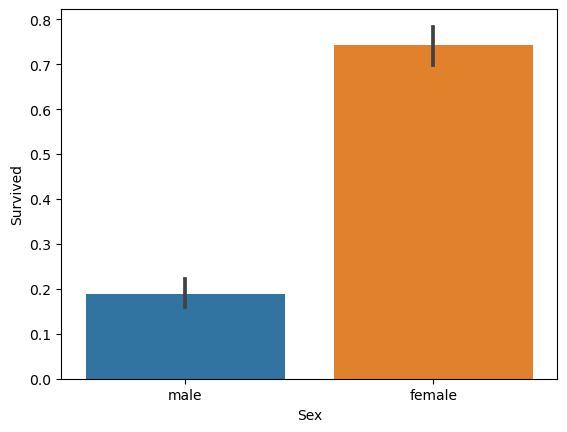

In [8]:
sns.barplot(x = 'Sex', y  = 'Survived', data = titanic_df)

### 데이터 탐색(2) 어떤 유형의 승객이 생존 확률이 높았을까? --부유한 정도
- 객실 등급으로 부를 측정

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

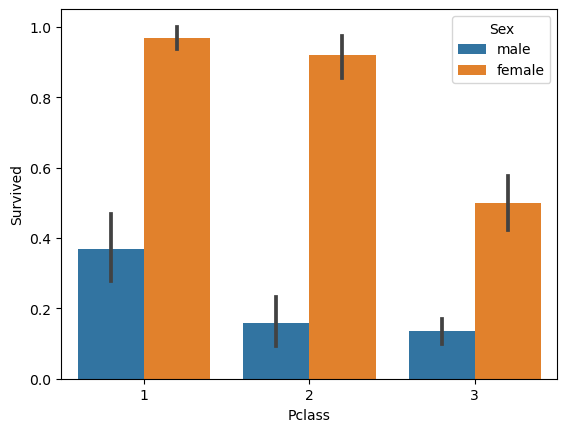

In [9]:
sns.barplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data = titanic_df)

### 데이터 탐색(3) 어떤 유형의 승객이 생존 확률이 높았을까? --나이
- 나이는 값이 많아 범주화 
- -1이하 오류값은 unknown

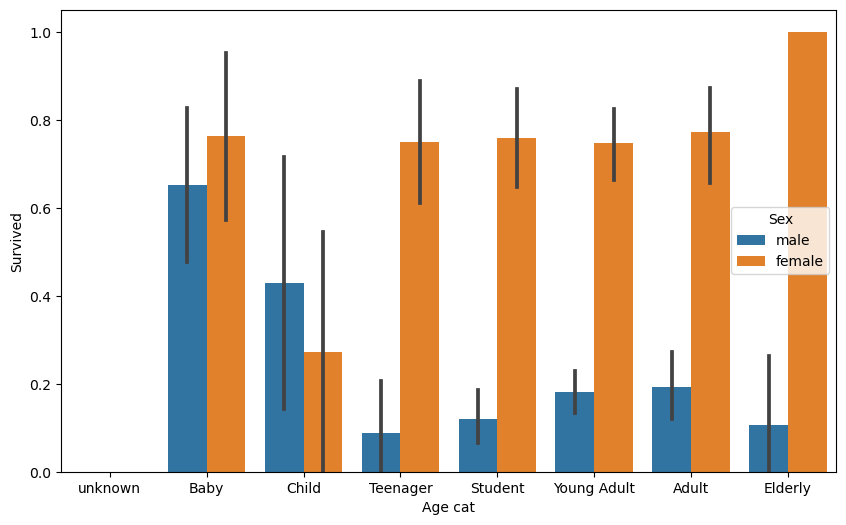

In [10]:
# age값에 따라 구분값을 반환하는 함수
def get_category(age):
    cat = ''
    if age <= -1 : cat = 'unknown'
    elif age <= 5 : cat = 'Baby'
    elif age <= 12 : cat = 'Child'
    elif age <= 18 : cat = 'Teenager'
    elif age <= 25 : cat = 'Student'
    elif age <= 35 : cat = 'Young Adult'
    elif age <= 60 : cat = 'Adult'
    else: cat = 'Elderly'
    
    return cat

plt.figure(figsize = (10, 6))
group_names = ['unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

titanic_df['Age cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
sns.barplot(x = 'Age cat', y = 'Survived', hue = 'Sex', data = titanic_df, order = group_names)
titanic_df.drop('Age cat', axis = 1, inplace = True)

### 문자열 피처를 숫자형으로 변환

In [11]:
from sklearn.preprocessing import LabelEncoder

def encode_features(dataDF):
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
        
    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


## 전처리 함수

In [12]:
# null 처리
def fillna(df):
    df['Age'].fillna(titanic_df['Age'].mean(), inplace = True)
    df['Cabin'].fillna('N', inplace = True)
    df['Embarked'].fillna('N', inplace = True)
    df['Fare'].fillna(0, inplace = True)
    return df

# 머신러닝시 불필요한 피처 제거
def drop_features(df):
    df.drop(['PassengerId', 'Ticket', 'Name'], axis = 1, inplace = True)
    return df

# 레이블 인코딩
def format_features(df):
    titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le.fit(df[feature])
        df[feature] = le.transform(df[feature]) 
    return df

# 전체 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [13]:
titanic_df = pd.read_csv('train.csv')

y_titanic_df = titanic_df['Survived']
x_titanic_df = titanic_df.drop('Survived', axis =1)

x_titanic_df = transform_features(x_titanic_df)

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_titanic_df, y_titanic_df, test_size = 0.2, random_state= 11)

## 1차 모델링

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 결정트리, 랜덤포레스트, 로지스틱 회귀를 위한 분류 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression(solver = 'liblinear')

# 결정트리 : 학습, 예측, 평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('Decision Tree Classifier 정확도:{0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# 랜덤포레스트
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForest 정확도:{0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# 로지스틱회귀
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('로지스틱회귀 정확도:{0:.4f}'.format(accuracy_score(y_test, lr_pred)))

Decision Tree Classifier 정확도:0.7989
RandomForest 정확도:0.8436
로지스틱회귀 정확도:0.8547


## kfold, cross_val_score(), GridSearchCV

In [16]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    # 폴드 세트가 5개인 kfold 객체 생성, 폴드 수만큼 예측결과를 저장할 리스트 객체 생성
    kfold = KFold(n_splits = folds)
    scores = []
    
    for iter_count, (train_index, test_index) in enumerate(kfold.split(x_titanic_df)):
        X_train, X_test = x_titanic_df.values[train_index], x_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]

        #학습, 예측, 정확도 계산
        clf.fit(X_train, y_train)
        prediction = clf.predict(X_test)
        accuracy = accuracy_score(y_test, prediction)
        scores.append(accuracy)
        print('교차검증 {0} 정확도: {1:.4f}'.format(iter_count, accuracy))
        
    # 5개 폴드 평균계산
    mean_score = np.mean(scores)
    print('평균 정확도:{0:.4f}'.format(mean_score))
    

# 함수 호출
exec_kfold(dt_clf, folds=5)

교차검증 0 정확도: 0.7486
교차검증 1 정확도: 0.7640
교차검증 2 정확도: 0.8202
교차검증 3 정확도: 0.7809
교차검증 4 정확도: 0.7921
평균 정확도:0.7812


In [17]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, x_titanic_df, y_titanic_df, cv = 5)

for iter_count, accuracy in enumerate(scores):
    print('교차검증 {0} 정확도 {1:.4f}'.format(iter_count, accuracy))

print('평균 정확도:{0:.4f}'.format(np.mean(scores)))

교차검증 0 정확도 0.7486
교차검증 1 정확도 0.7753
교차검증 2 정확도 0.8090
교차검증 3 정확도 0.7584
교차검증 4 정확도 0.8034
평균 정확도:0.7789


In [18]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2, 3, 5, 10],
             'min_samples_split':[2, 3, 5],
             'min_samples_leaf':[1, 5, 8]}

grid_dclf = GridSearchCV(dt_clf, param_grid = parameters, scoring = 'accuracy', cv = 5)
grid_dclf.fit(X_train, y_train)

print('최적 하이퍼 파라미터:', grid_dclf.best_params_)
print('최고 정확도:{0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print('테스트 데이터 정확도: {0:.4f}'.format(accuracy))

최적 하이퍼 파라미터: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}
최고 정확도:0.7993
테스트 데이터 정확도: 0.8659


# 정밀도/재현율

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# 여러가지 평가지표를 한번에 호출하는 함수 작성(블로그)
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도:{0:.4f}, 정밀도:{1:.4f}, 재현율:{2:.4f}'.format(accuracy, precision, recall))

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

titanic_df = pd.read_csv('train.csv')
y_titanic_df = titanic_df['Survived']
x_titanic_df = titanic_df.drop('Survived', axis = 1)
x_titanic_df = transform_features(x_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(x_titanic_df, y_titanic_df, test_size = 0.2, random_state=11)
#solver의 기본값은 lbfgs(데이터 크고, 다중분류일때 적합), liblinear(작은데이터셋의 이진분류에 적합)
lr_clf = LogisticRegression(solver = 'liblinear')
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)

get_clf_eval(y_test, pred)

오차 행렬
[[108  10]
 [ 16  45]]
정확도:0.8547, 정밀도:0.8182, 재현율:0.7377


In [21]:
pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)

print('pred_proba() 결과 shape: {0}'.format(pred_proba.shape))
print('\npred_proba array에서 앞 3개만 샘플로 추출: \n', pred_proba[:3])

# 예측 확률 array와 예측 결괏값 array를 병합해 예측 확률과 결괏값을 한번에 확인
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1, 1)], axis = 1)
print('\n두 개의 class 중, 더 큰 확률을 클래스 값으로 예측 \n', pred_proba_result[:3])

pred_proba() 결과 shape: (179, 2)

pred_proba array에서 앞 3개만 샘플로 추출: 
 [[0.45394754 0.54605246]
 [0.86558975 0.13441025]
 [0.8656981  0.1343019 ]]

두 개의 class 중, 더 큰 확률을 클래스 값으로 예측 
 [[0.45394754 0.54605246 1.        ]
 [0.86558975 0.13441025 0.        ]
 [0.8656981  0.1343019  0.        ]]


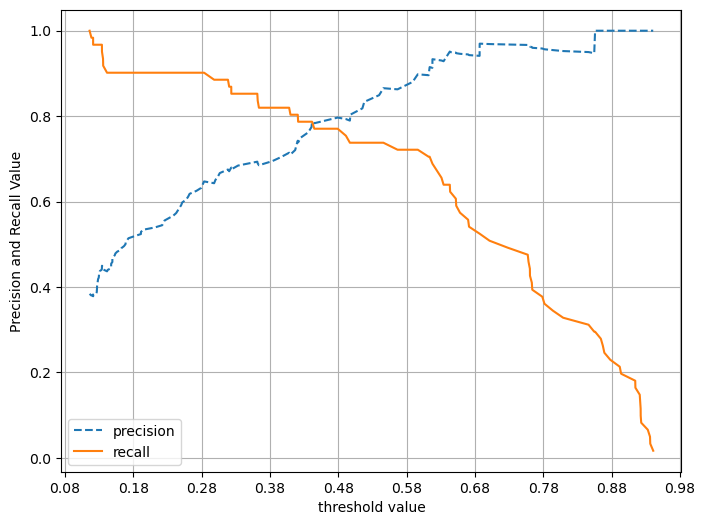

In [22]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.metrics import precision_recall_curve

def precision_recall_curve_plot(y_test, pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출.
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    plt.figure(figsize = (8, 6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label = 'precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label = 'recall')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    plt.xlabel('threshold value')
    plt.ylabel('Precision and Recall Value')
    plt.legend()
    plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])

In [23]:
precisions, recalls, thresholds = precision_recall_curve(y_test, lr_clf.predict_proba(X_test)[:,1])
threshold_boundary = thresholds.shape[0]

# plt.plot(thresholds, precisions)
precisions[0:threshold_boundary]


array([0.3836478 , 0.37974684, 0.38216561, 0.37820513, 0.38064516,
       0.38311688, 0.38562092, 0.38815789, 0.39072848, 0.39597315,
       0.40136054, 0.41843972, 0.42142857, 0.42446043, 0.43065693,
       0.43382353, 0.43703704, 0.44029851, 0.44360902, 0.4469697 ,
       0.44615385, 0.4496124 , 0.4453125 , 0.44094488, 0.43650794,
       0.44      , 0.44354839, 0.44715447, 0.45081967, 0.45454545,
       0.45833333, 0.46610169, 0.47008547, 0.47413793, 0.47826087,
       0.48245614, 0.48672566, 0.49107143, 0.4954955 , 0.5       ,
       0.50458716, 0.50925926, 0.51401869, 0.51886792, 0.52380952,
       0.52884615, 0.53398058, 0.53921569, 0.54455446, 0.55      ,
       0.55555556, 0.56122449, 0.56701031, 0.57291667, 0.59139785,
       0.59782609, 0.6043956 , 0.61111111, 0.61797753, 0.625     ,
       0.63218391, 0.63953488, 0.64705882, 0.64285714, 0.65060241,
       0.65853659, 0.66666667, 0.675     , 0.67088608, 0.67948718,
       0.67532468, 0.68421053, 0.69333333, 0.68918919, 0.68493

## f1 스코어

In [24]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, pred)
print('f1 스코어:{0:.4f}'.format(f1))

f1 스코어:0.7759


In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# 여러가지 평가지표를 한번에 호출하는 함수 작성(블로그)
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도:{0:.4f}, 정밀도:{1:.4f}, 재현율:{2:.4f}, f1:{3:.4f}'.format(accuracy, precision, recall, f1))
    
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6]
pred_proba = lr_clf.predict_proba(X_test)
# get_clf_eval_by_threshold(y_test, )

In [28]:
from sklearn.metrics import roc_curve, roc_auc_score

# 레이블 값이 1일 때의 예측 확률 추출
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

# fprs, tprs, thresholds = roc_curve(y_test, pred_proba)
roc_score = roc_auc_score(y_test, pred_proba)

print('ROC AUC 값: {0:.4f}'.format(roc_score))

ROC AUC 값: 0.8980
